## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    # enumerate參數為可遍歷/可叠代的對象(如列表、字符串)多用於在for循環中得到計數，利用它可以同時獲得索引和值
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
#MOMENTUM = 0.95

In [7]:

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

def Training_model(LEARNING_RATE, MOMENTUM, para, results):
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov = para, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        
        exp_name_tag = "exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def Draw_Result(results):
    color_bar = ["r", "g", "b", "y", "m", "k"]
    
    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results_T95.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

W0717 22:01:43.042252 13028 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0717 22:01:43.043227 13028 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 22:01:43.056193 13028 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 22:01:43.057189 13028 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 22:01:43.059184 13028 deprecation_wrapper.py:119] From D:\Anaconda3\li

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)       

Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)       

50000/50000 [==============================] - 4s 85us/step - loss: 0.4738 - acc: 0.8298 - val_loss: 2.0853 - val_acc: 0.5212
Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)             

Epoch 50/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.7619 - acc: 0.7274 - val_loss: 1.5376 - val_acc: 0.5224
Experiment with LR = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32) 

50000/50000 [==============================] - 4s 87us/step - loss: 1.5458 - acc: 0.4495 - val_loss: 1.5612 - val_acc: 0.4477
Epoch 50/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.5408 - acc: 0.4499 - val_loss: 1.5575 - val_acc: 0.4461
Experiment with LR = 0.000010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)       

Epoch 49/50
50000/50000 [==============================] - 4s 86us/step - loss: 2.0485 - acc: 0.2733 - val_loss: 2.0448 - val_acc: 0.2740
Epoch 50/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.0433 - acc: 0.2743 - val_loss: 2.0396 - val_acc: 0.2751


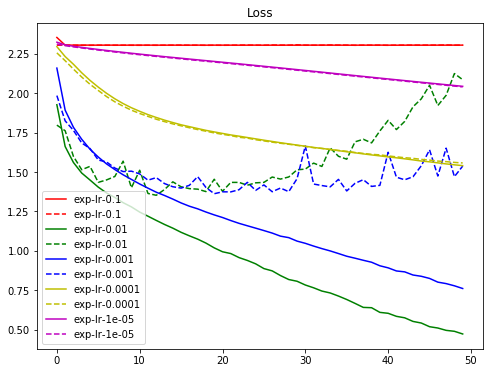

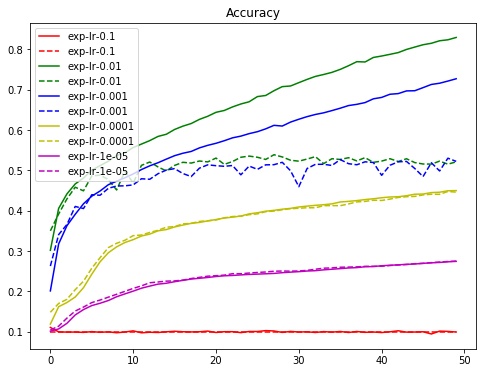

In [9]:
results_T95 = {}
MOMENTUM = 0.95
Training_model(LEARNING_RATE, MOMENTUM, 1, results_T95)

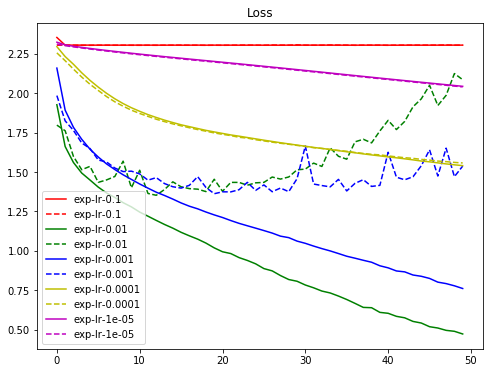

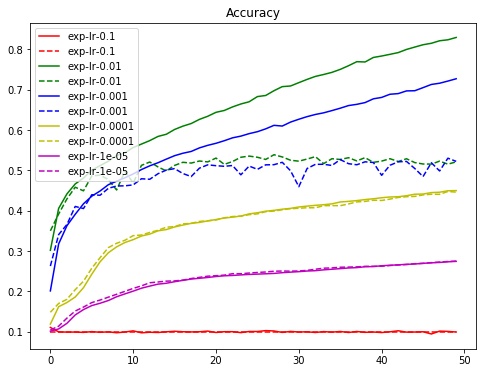

In [10]:
Draw_Result(results_T95)

In [11]:
results_F95 = {}
MOMENTUM = 0.95
Training_model(LEARNING_RATE, MOMENTUM, 0, results_F95)

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)       

Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)       

Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)       

50000/50000 [==============================] - 4s 83us/step - loss: 0.8869 - acc: 0.6801 - val_loss: 1.4788 - val_acc: 0.5146
Experiment with LR = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)             

Epoch 50/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.5319 - acc: 0.4580 - val_loss: 1.5506 - val_acc: 0.4521
Experiment with LR = 0.000010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32) 

Epoch 50/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.0267 - acc: 0.2756 - val_loss: 2.0270 - val_acc: 0.2767


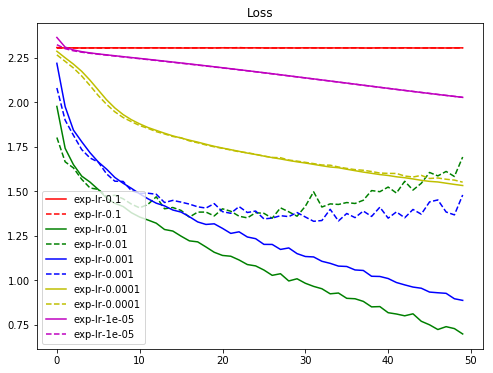

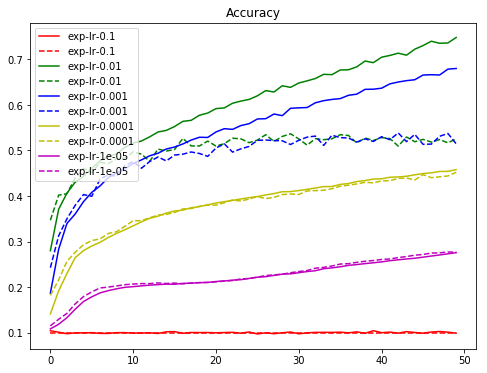

In [12]:
Draw_Result(results_F95)

In [13]:
results_T50 = {}
MOMENTUM = 0.50
Training_model(LEARNING_RATE, MOMENTUM, 1, results_T50)

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)       

50000/50000 [==============================] - 5s 96us/step - loss: 0.7922 - acc: 0.7172 - val_loss: 1.7366 - val_acc: 0.4913
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)             

50000/50000 [==============================] - 5s 107us/step - loss: 0.9960 - acc: 0.6463 - val_loss: 1.3841 - val_acc: 0.5147
Epoch 50/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.9759 - acc: 0.6532 - val_loss: 1.6026 - val_acc: 0.4864
Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)     

50000/50000 [==============================] - 5s 106us/step - loss: 1.5736 - acc: 0.4430 - val_loss: 1.5762 - val_acc: 0.4357
Epoch 49/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.5665 - acc: 0.4470 - val_loss: 1.5752 - val_acc: 0.4390
Epoch 50/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.5617 - acc: 0.4464 - val_loss: 1.6198 - val_acc: 0.4294
Experiment with LR = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 1

50000/50000 [==============================] - 5s 109us/step - loss: 2.0315 - acc: 0.2699 - val_loss: 2.0291 - val_acc: 0.2702
Epoch 48/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.0266 - acc: 0.2730 - val_loss: 2.0241 - val_acc: 0.2725
Epoch 49/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.0217 - acc: 0.2742 - val_loss: 2.0194 - val_acc: 0.2766
Epoch 50/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.0170 - acc: 0.2761 - val_loss: 2.0146 - val_acc: 0.2785
Experiment with LR = 0.000010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (

50000/50000 [==============================] - 5s 107us/step - loss: 2.2895 - acc: 0.1529 - val_loss: 2.2885 - val_acc: 0.1565
Epoch 47/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.2892 - acc: 0.1535 - val_loss: 2.2881 - val_acc: 0.1567
Epoch 48/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.2889 - acc: 0.1542 - val_loss: 2.2878 - val_acc: 0.1572
Epoch 49/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.2886 - acc: 0.1547 - val_loss: 2.2875 - val_acc: 0.1589
Epoch 50/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.2883 - acc: 0.1551 - val_loss: 2.2872 - val_acc: 0.1603


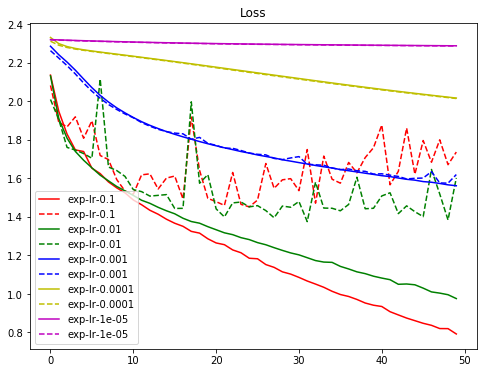

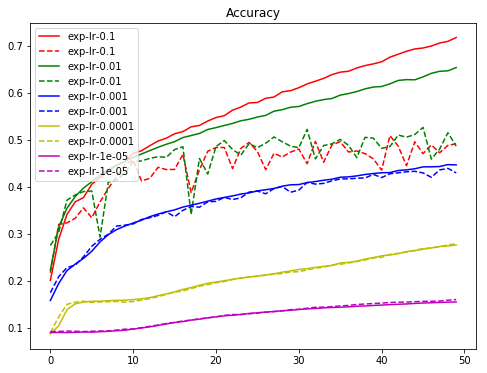

In [14]:
Draw_Result(results_T50)

In [15]:
results_F50 = {}
MOMENTUM = 0.50
Training_model(LEARNING_RATE, MOMENTUM, 0, results_F50)

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)       

50000/50000 [==============================] - 4s 83us/step - loss: 0.7098 - acc: 0.7470 - val_loss: 1.8415 - val_acc: 0.4902
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)             

Epoch 50/50
50000/50000 [==============================] - 4s 82us/step - loss: 0.9330 - acc: 0.6664 - val_loss: 1.4156 - val_acc: 0.5215
Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32) 

50000/50000 [==============================] - 4s 83us/step - loss: 1.5458 - acc: 0.4537 - val_loss: 1.5615 - val_acc: 0.4432
Epoch 50/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5397 - acc: 0.4565 - val_loss: 1.5764 - val_acc: 0.4390
Experiment with LR = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)       

Epoch 49/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.0410 - acc: 0.2529 - val_loss: 2.0412 - val_acc: 0.2491
Epoch 50/50
50000/50000 [==============================] - 4s 83us/step - loss: 2.0365 - acc: 0.2548 - val_loss: 2.0369 - val_acc: 0.2505
Experiment with LR = 0.000010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None

50000/50000 [==============================] - 4s 82us/step - loss: 2.2824 - acc: 0.1585 - val_loss: 2.2823 - val_acc: 0.1594
Epoch 49/50
50000/50000 [==============================] - 4s 83us/step - loss: 2.2819 - acc: 0.1587 - val_loss: 2.2818 - val_acc: 0.1596
Epoch 50/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.2814 - acc: 0.1593 - val_loss: 2.2813 - val_acc: 0.1601


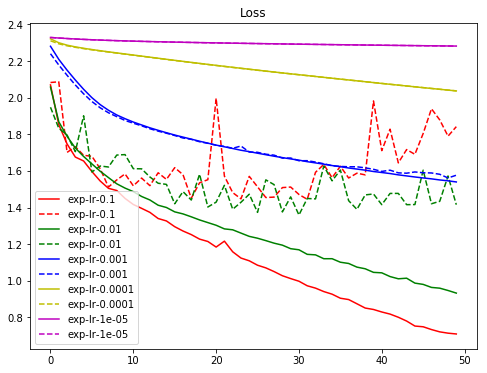

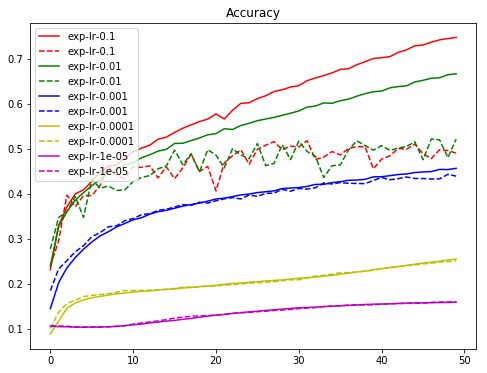

In [16]:
Draw_Result(results_F50)